In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import string

import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfTransformer 
from sklearn.cluster import KMeans

In [2]:
data = pd.read_json('chislab.json',orient="split")
data.shape

(157110, 17)

In [3]:
url = pd.DataFrame()
url['url'] = data.url

In [4]:
a = url['url'].str.slice(1).str.split('/')
url_str = a.map(lambda x: ' '.join(x)).str.lower()
url_str[:5]

0       synchrony-proxy v1 bayeux-sync1
1       synchrony-proxy v1 bayeux-sync1
2    json startheartbeatactivity.action
3       synchrony-proxy v1 bayeux-sync1
4       synchrony-proxy v1 bayeux-sync1
Name: url, dtype: object

In [5]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(url_str) 

In [6]:
url_array = tfidf_matrix.toarray()
url_array.shape

(157110, 1225)

In [7]:
i = 4
clf = KMeans(n_clusters=i)  
s = clf.fit(url_array)  

In [43]:
centers = clf.cluster_centers_
url['class'] = clf.labels_

In [44]:
top = pd.DataFrame(centers.T)
top['Name'] = tfidf_vectorizer.get_feature_names()

for i in range(i):
    top_1 = top.sort_values(i,ascending=False).iloc[:20, :]
    a = ', '.join(top_1['Name']).title()
    print(str(a))
    print(' ')

Sync1, Bayeux, V1, Proxy, Synchrony, Webresources, Latest, Resources, Navigation, Action, Startheartbeatactivity, Avatar, Json, Attachments, Viewpage, Js, Calendar, 7702, Helptips, Highlighting
 
Bulk, Analytics, Publish, Rest, V1, Bayeux, Sync1, Json, Latest, Resources, Startheartbeatactivity, Action, Capabilities, Attachments, Zh_Cn, Download, Css, Editor, Inlinecomments, Batch
 
Startheartbeatactivity, Json, Action, Proxy, V1, Sync1, Bayeux, Latest, Analytics, Publish, Bulk, Resources, Attachments, Rest, Zh_Cn, C32F84C806260A834C2E109E904A2D8Ee4F8E175, Likes, Download, Inlinecomments, Css
 
Rest, Capabilities, Navigation, Resources, Webresources, Latest, Download, Action, Heartbeat, Status, Mywork, Notification, Count, Quickreload, Plugins, User, Attachments, Avatar, Confluence, Tips
 


In [45]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)             #输出两维
newData = pca.fit_transform(url_array)   #载入N维

In [46]:
url['PCA1'] = newData[:,0]
url['PCA2'] = newData[:,1]
url.head()

,url,class,PCA1,PCA2
0,/synchrony-proxy/v1/bayeux-sync1,0,-0.348733,-0.001162
1,/synchrony-proxy/v1/bayeux-sync1,0,-0.348733,-0.001162
2,/json/startheartbeatactivity.action,2,0.764954,0.837007
3,/synchrony-proxy/v1/bayeux-sync1,0,-0.348733,-0.001162
4,/synchrony-proxy/v1/bayeux-sync1,0,-0.348733,-0.001162


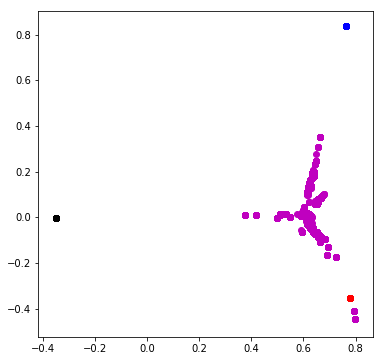

In [47]:
fig = plt.figure(figsize=(6,6))

color = ['k', 'r', 'b', 'm', 'g', 'y', 'c']

z1 = url[url['class']==0]
plt.scatter(z1['PCA1'], z1['PCA2'], color=color[0]) 
z2 = url[url['class']==1]
plt.scatter(z2['PCA1'], z2['PCA2'], color=color[1]) 
z3 = url[url['class']==2]
plt.scatter(z3['PCA1'], z3['PCA2'], color=color[2]) 
z4 = url[url['class']==3]
plt.scatter(z4['PCA1'], z4['PCA2'], color=color[3]) 

In [ ]:
#### 运行一次就行 #####
from sklearn.manifold import TSNE
tsne = TSNE()
tsne.fit_transform(url_array)
tsne = pd.DataFrame(tsne.embedding_)